In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
data = pd.read_csv('forestfires.csv')

–ö–æ–ª–æ–Ω–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:

In [ ]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

–û–±–∑–æ—Ä —Å–æ–¥–µ—Ä–∂–∞—â–µ–π—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏:

In [ ]:
data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
* X - –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ X –ø–æ–∂–∞—Ä–∞
* Y - –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ Y –ø–æ–∂–∞—Ä–∞
* month - –º–µ—Å—è—Ü –ø–æ–∂–∞—Ä–∞
* day - –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –ø–æ–∂–∞—Ä–∞
* FFMC - –∏–Ω–¥–µ–∫—Å FFMC –∏–∑ —Å–∏—Å—Ç–µ–º—ã FWI
* DMC - –∏–Ω–¥–µ–∫—Å DMC –∏–∑ —Å–∏—Å—Ç–µ–º—ã FWI
* DC - –∏–Ω–¥–µ–∫—Å DC –∏–∑ —Å–∏—Å—Ç–µ–º—ã FWI
* ISI - –∏–Ω–¥–µ–∫—Å ISI –∏–∑ —Å–∏—Å—Ç–µ–º—ã FWI
* temp - —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
* RH - –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –≤–ª–∞–∂–Ω–æ—Å—Ç—å
* wind - —Å–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞
* rain - –¥–æ–∂–¥—å
* area - –ø–ª–æ—â–∞–¥—å –≤—ã–≥–æ—Ä–µ–≤—à–µ–≥–æ –ª–µ—Å–∞

–ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é

In [ ]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

# **1.EDA**

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–Ω–Ω–æ–π

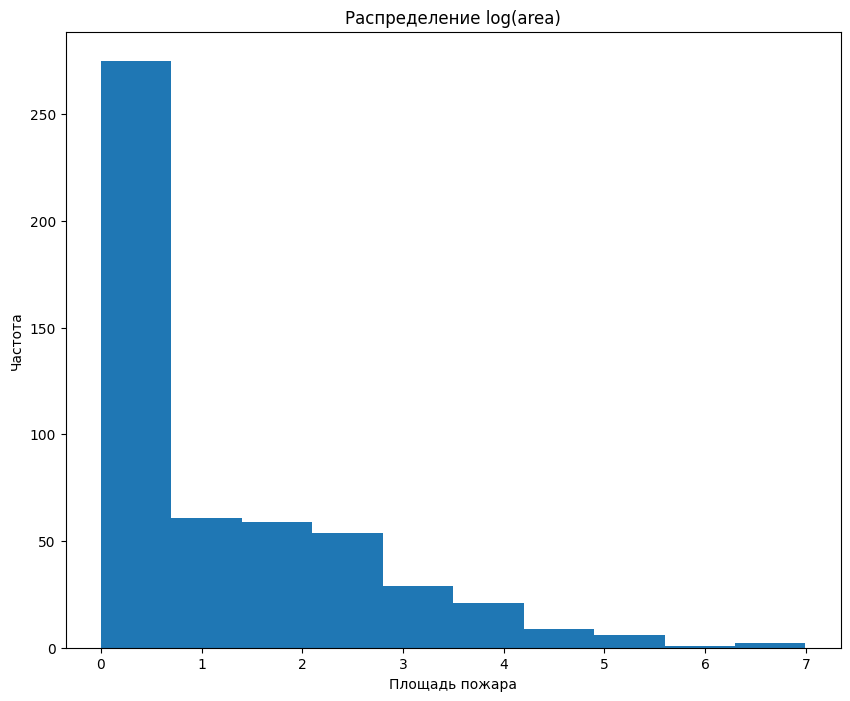

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ log(area)')
plt.hist(np.log1p(data['area']))
plt.xlabel('–ü–ª–æ—â–∞–¥—å –ø–æ–∂–∞—Ä–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

–í–∏–¥–∏–º –º–Ω–æ–≥–æ –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ —Ä–µ–¥–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

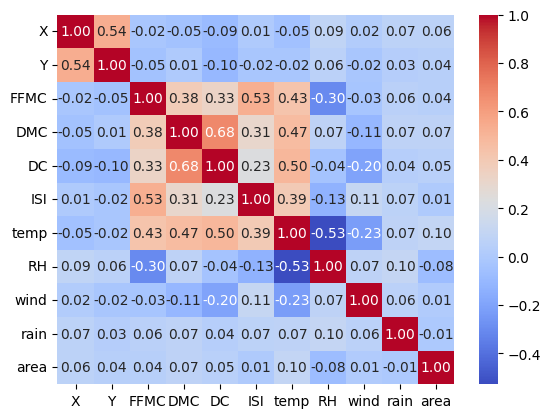

In [ ]:
data_corr = data.select_dtypes(exclude = 'object').corr()
sns.heatmap(data_corr, cmap = 'coolwarm', annot = True, fmt = '.2f' )
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å


1.   –ü–ª–æ—â–∞–¥–∏ –ø–æ–∂–∞—Ä–∞ –æ—Ç –º–µ—Å—è—Ü–∞
2.   –ü–ª–æ—â–∞–¥–∏ –ø–æ–∂–∞—Ä–∞ –æ—Ç –∫–ª–∏–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π (–≤–µ—Ç—Ä–∞, —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –∏ —Ç–ø)
3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º



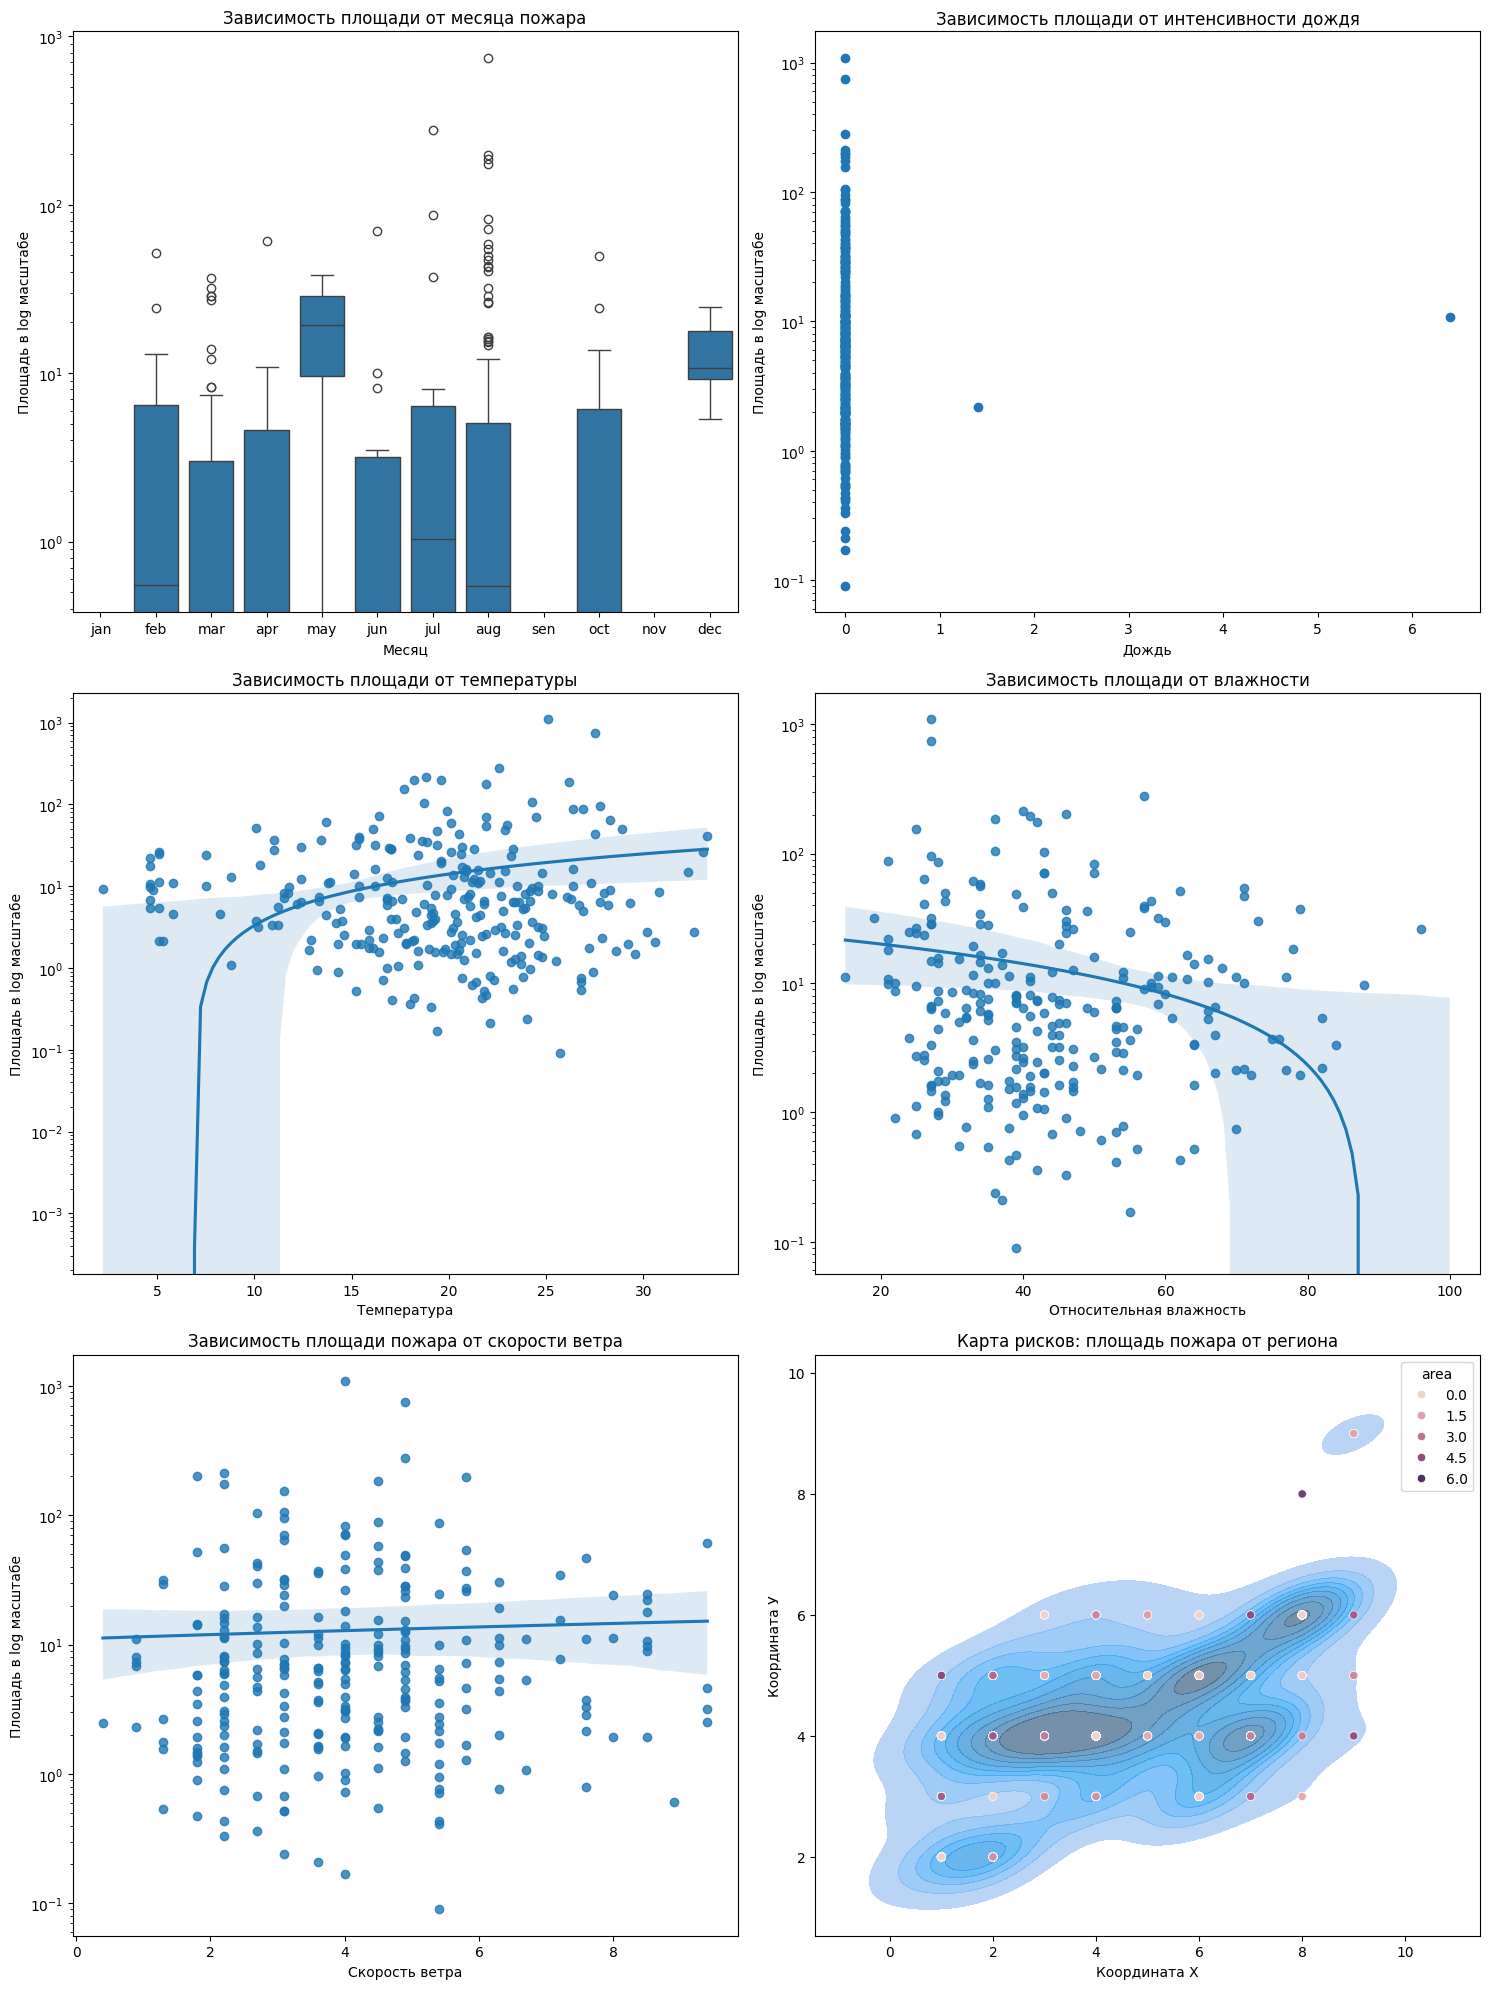

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (15, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

#1. –†–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –ø–æ –º–µ—Å—è—Ü–∞–º
x1 = data['month']
y1 = data['area']
sns.boxplot(x = x1, y = y1, ax = axs[0, 0], order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sen', 'oct', 'nov', 'dec'])
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–ª–æ—â–∞–¥–∏ –æ—Ç –º–µ—Å—è—Ü–∞ –ø–æ–∂–∞—Ä–∞')
axs[0,0].set_xlabel('–ú–µ—Å—è—Ü')
axs[0,0].set_ylabel('–ü–ª–æ—â–∞–¥—å –≤ log –º–∞—Å—à—Ç–∞–±–µ')

#2. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –¥–æ–∂–¥—è
x2 = data['rain']
y2 = data['area']
axs[0, 1].scatter(x2, y2)
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–ª–æ—â–∞–¥–∏ –æ—Ç –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –¥–æ–∂–¥—è')
axs[0,1].set_xlabel('–î–æ–∂–¥—å')
axs[0,1].set_ylabel('–ü–ª–æ—â–∞–¥—å –≤ log –º–∞—Å—à—Ç–∞–±–µ')

#3. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã
x3 = data['temp']
y3 = data['area']
sns.regplot(x = x3, y = y3, ax = axs[1, 0])
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–ª–æ—â–∞–¥–∏ –æ—Ç —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã')
axs[1,0].set_xlabel('–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞')
axs[1,0].set_ylabel('–ü–ª–æ—â–∞–¥—å –≤ log –º–∞—Å—à—Ç–∞–±–µ')

#4. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –≤–ª–∞–∂–Ω–æ—Å—Ç–∏
x4 = data['RH']
y4 = data['area']
sns.regplot(x = x4, y = y4, ax = axs[1, 1])
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–ª–æ—â–∞–¥–∏ –æ—Ç –≤–ª–∞–∂–Ω–æ—Å—Ç–∏')
axs[1,1].set_xlabel('–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –≤–ª–∞–∂–Ω–æ—Å—Ç—å')
axs[1,1].set_ylabel('–ü–ª–æ—â–∞–¥—å –≤ log –º–∞—Å—à—Ç–∞–±–µ')

#5. –ó–∞–≤–∏—Å–∏–º–æ—Å—å –æ—Ç –≤–µ—Ç—Ä–∞
x5 = data['wind']
y5 = data['area']
sns.regplot(x = x5, y = y5, ax = axs[2, 0])
axs[2, 0].set_yscale('log')
axs[2, 0].set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–ª–æ—â–∞–¥–∏ –ø–æ–∂–∞—Ä–∞ –æ—Ç —Å–∫–æ—Ä–æ—Å—Ç–∏ –≤–µ—Ç—Ä–∞')
axs[2,0].set_xlabel('–°–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞')
axs[2,0].set_ylabel('–ü–ª–æ—â–∞–¥—å –≤ log –º–∞—Å—à—Ç–∞–±–µ')

#6. –ö–∞—Ä—Ç—ã —Ä–∏—Å–∫–æ–≤: –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–æ–∂–∞—Ä–∞ –æ—Ç —Ä–µ–≥–∏–æ–Ω–∞
x6 = data['X']
y6 = data['Y']
sns.kdeplot(x = x6, y = y6, ax= axs[2, 1], fill = True, alpha = 0.7)
sns.scatterplot(x = x6, y = y6, hue = np.log1p(data['area']), ax = axs[2, 1])
axs[2, 1].set_title('–ö–∞—Ä—Ç–∞ —Ä–∏—Å–∫–æ–≤: –ø–ª–æ—â–∞–¥—å –ø–æ–∂–∞—Ä–∞ –æ—Ç —Ä–µ–≥–∏–æ–Ω–∞')
axs[2,1].set_xlabel('–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –•')
axs[2,1].set_ylabel('–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –£')

plt.tight_layout()
plt.show()

**–í—ã–≤–æ–¥—ã:**
1. –í–∏–¥–Ω–æ, —á—Ç–æ –≤ –º–∞–µ –∏ –¥–µ–∫–∞–±—Ä–µ —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ –ø–æ –ø–ª–æ—â–∞–¥–∏ –ø–æ–∂–∞—Ä—ã. –ü—Ä–∏ —ç—Ç–æ–º –≤ –º–∞–µ —à–∏—Ä–æ–∫–∏–π —Ä–∞–∑–±—Ä–æ—Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –∞–≤–≥—É—Å—Ç–µ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤
2. –ü–æ–∂–∞—Ä—ã –≤–æ–∑–Ω–∏–∫–∞—é—Ç, –∫–æ–≥–¥–∞ –Ω–µ—Ç –¥–æ–∂–¥—è (–∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≤—ã–±—Ä–æ—Å–æ–≤)
3. –í–∏–¥–Ω–∞ –¥–∏–Ω–∞–º–∏–∫–∞: —á–µ–º –≤—ã—à–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, —Ç–µ–º —á–∞—â–µ –≤–æ–∑–Ω–∏–∫–∞—é—Ç –ø–æ–∂–∞—Ä—ã –∏ —Ç–µ–º –±–æ–ª—å—à–µ –∏—Ö –ø–ª–æ—â–∞–¥—å
4. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ, —á–µ–º –≤—ã—à–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –≤–ª–∞–∂–Ω–æ—Å—Ç—å, —Ç–µ–º —Ä–µ–∂–µ –∏ —Å –º–µ–Ω—å—à–µ–π –ø–ª–æ—â–∞–¥—å—é –≤–æ–∑–Ω–∏–∫–∞—é—Ç –ª–µ—Å–Ω—ã–µ –ø–æ–∂–∞—Ä—ã
5. –°–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞ —Å–ª–∞–±–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
6. –ß–∞—â–µ –≤—Å–µ–≥–æ –ø–æ–∂–∞—Ä—ã –≤–æ–∑–Ω–∏–∫–∞—é—Ç –≤ —Ä–µ–≥–∏–æ–Ω–µ —Å –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ X –æ—Ç 2 –¥–æ 4, Y = 4, –ø—Ä–∏ —ç—Ç–æ–º –ø–ª–æ—â–∞–¥—å –ø–æ–∂–∞—Ä–∞ –Ω–µ–±–æ–ª—å—à–∞—è

# **2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

In [ ]:
data.sum().isna()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤—Å–µ–≥–æ 2 - —ç—Ç–æ month –∏ day. –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∏—Ö —Å –ø–æ–º–æ—â—å—é OneHotEncoder.

In [ ]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
ohe = OneHotEncoder()
codes = ohe.fit_transform(data[['month', 'day']]).toarray()
feature_names = ohe.get_feature_names_out()
data = pd.concat([data.drop(labels = ['month', 'day'], axis = 1), pd.DataFrame(codes, columns = feature_names)], axis = 1)

In [ ]:
data.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...        0.0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...        0.0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...        0.0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...        0.0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...        0.0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0        0.0        0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1        1.0        0.0      0.0      0.0      0.0      0.0      0.0      1.0   
2        1.0        0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3        0.0        0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4        0.0        0.0      0.0      0.0      0.0      1.0      0.0      0.0   

   day_wed  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 30 columns]

# **3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**

In [ ]:
X = data.drop('area', axis = 1)
y = data['area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv_score = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE = {rmse:.2f}')
print(f'MAE = {mae:.2f}')
print(f'CV score = {-1*cv_score.mean():.2f}')


RMSE = 12012.94
MAE = 26.88
CV score = 47.64


–ó–Ω–∞—á–µ–Ω–∏–µ RMSE –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∏–∑-–∑–∞ –≤—ã–±—Ä–æ—Å–æ–≤. –ó–Ω–∞—á–µ–Ω–∏–µ –ú–ê–ï —Ö–æ—Ä–æ—à–æ –¥–ª—è –±–æ–ª—å—à–∏—Ö –ø–æ–∂–∞—Ä–æ–≤, –Ω–æ –ø–ª–æ—Ö–æ –¥–ª—è –º–∞–ª–µ–Ω—å–∫–∏—Ö –∏–ª–∏ –Ω—É–ª–µ–≤—ã—Ö.

–ü–æ–ø—Ä–æ–±—É–µ–º —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –æ—à–∏–±–æ–∫

In [ ]:
q1 = data['area'].quantile(0.25)
q3 = data['area'].quantile(0.75)
iqr = q3 - q1
data_2 = data[(data['area'] < q3 + 1.5 * iqr) & (data['area'] > q1 - 1.5 * iqr)]

In [ ]:
X_2 = data_2.drop('area', axis = 1)
y_2 = data_2['area']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)

RMSE = 4.00
MAE = 2.95
CV score = 3.94


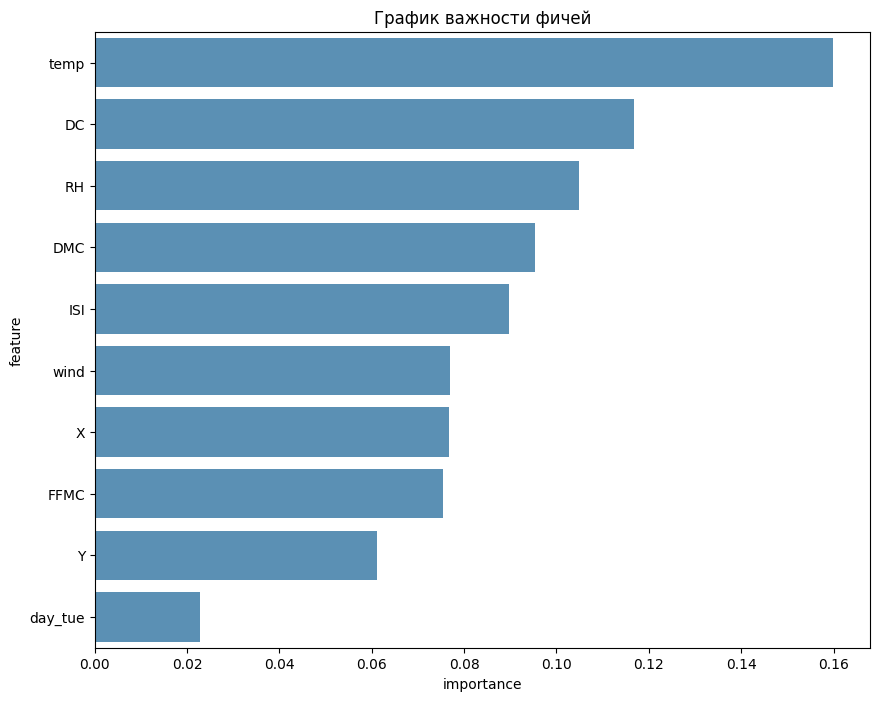

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

cv_score_2 = cross_val_score(model, X_train_2, y_train_2, cv = 5, scoring = 'neg_root_mean_squared_error')

rmse_2 = root_mean_squared_error(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
print(f'RMSE = {rmse_2:.2f}')
print(f'MAE = {mae_2:.2f}')
print(f'CV score = {-1*cv_score_2.mean():.2f}')

#–ì—Ä–∞—Ñ–∏–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ñ–∏—á–µ–π
feature_imp = pd.DataFrame({
    'feature': X_train_2.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

plt.figure(figsize=(10, 8))
sns.barplot(data = feature_imp.head(10), x = 'importance', y = 'feature',alpha = 0.8)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ñ–∏—á–µ–π')
plt.show()

RMSE –∏ MAE —Å—Ç–∞–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ, –Ω–æ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ (–∏–∑-–∑–∞ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω—É–ª–µ–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ).  –¢–æ–ø —Ñ–∏—á–∏ - —ç—Ç–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ DC, –ª–æ–≥–∏—á–Ω–æ –ª–∏–¥–∏—Ä—É—é—Ç, —Ç–∞–∫ –∫–∞–∫ —Å—É—Ö–æ—Å—Ç—å/–∂–∞—Ä–∞ –ø—Ä–æ–≤–æ—Ü–∏—Ä—É—é—Ç –ø–æ–∂–∞—Ä—ã

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º –±—É—Å—Ç–∏–Ω–≥–æ–º **XGBoost**

RMSE = 4.39
MAE = 3.04
CV score 4.33


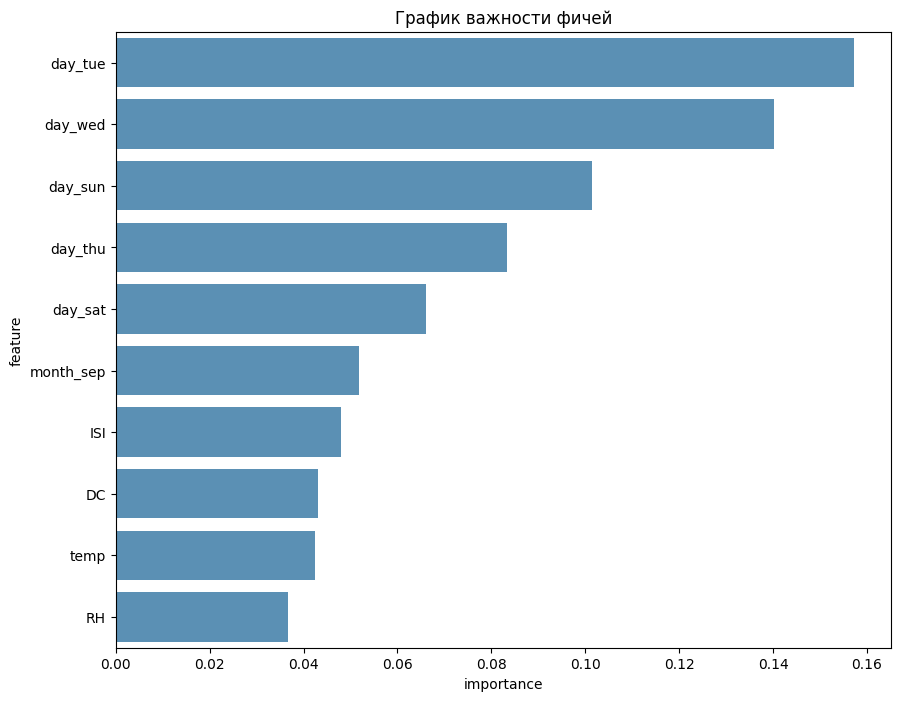

In [ ]:
model = xgb.XGBRegressor(verbosity = 0, eval_metric = 'rmse', random_state = 42)
model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

cv_score = cross_val_score(model, X_train_2, y_train_2, cv = 5, scoring = 'neg_root_mean_squared_error')

rmse = root_mean_squared_error(y_test_2, y_pred_2)
mae = mean_absolute_error(y_test_2, y_pred_2)
print(f'RMSE = {rmse:.2f}')
print(f'MAE = {mae:.2f}')
print(f'CV score {-1*cv_score.mean():.2f}')

#–ì—Ä–∞—Ñ–∏–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ñ–∏—á–µ–π
feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

plt.figure(figsize=(10, 8))
sns.barplot(data = feature_imp.head(10), x = 'importance', y = 'feature',alpha = 0.8)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Ñ–∏—á–µ–π')
plt.show()

–û–Ω –ø–æ–∫–∞–∑–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ–º–Ω–æ–≥–æ —Ö—É–∂–µ, —á–µ–º Random Forest. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –∏–∑-–∑–∞ –º–∞–ª–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ—à–∞—é—â–∏—Ö –ø–Ω–µ–π –≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º –±—É—Å—Ç–∏–Ω–≥–µ. –¢–∞–∫–∂–µ –¥–ª—è –Ω–µ–≥–æ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–º–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –¥—Ä—É–≥–∏–µ —Ñ–∏—á–∏ - –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏ –∏ –º–µ—Å—è—Ü. –ü–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —á—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫

# 4. **–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**

–ü–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é GridSearchCV

In [ ]:
params = {
    'n_estimators': [300, 500, 700, 900, 1100],
    'max_depth': [4, 6, 8, 10],
    'learning_rate':[0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [4, 6, 8, 10],
    'reg_lambda': [4, 6, 8, 10]
}
cross_val = GridSearchCV(xgb.XGBRegressor(verbosity = 0, random_state = 42), params, cv= 5, scoring = 'neg_root_mean_squared_error')
cross_val.fit(X_train_2, y_train_2)

print(f'Best params: {cross_val.best_params_}')
print(f'CV_score = {-1*cross_val.best_score_:.2f}')

Best params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 10, 'reg_lambda': 6, 'subsample': 1.0}
CV_score = 3.78


–ü–æ—Å–ª–µ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –≥—Ä–∏–¥–æ–≤–æ–π —Å–µ—Ç–∫–∏ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç–∞–ª–∏ –ª—É—á—à–µ

In [ ]:
model = xgb.XGBRegressor(**cross_val.best_params_, verbosity = 0, eval_metric = 'rmse', random_state = 42)
model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

rmse = root_mean_squared_error(y_test_2, y_pred_2)
mae = mean_absolute_error(y_test_2, y_pred_2)
print(f'RMSE = {rmse:.2f}')
print(f'MAE = {mae:.2f}')

RMSE = 3.85
MAE = 2.79


–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π **Optuna** –¥–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–≥–æ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [ ]:
import optuna
from optuna.samplers import TPESampler

In [ ]:
def optimize_xgboost(trial, X_train, y_train):
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 2, 10),
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
      'subsample': trial.suggest_float('subsample', 0.2, 1.0),
      'reg_alpha': trial.suggest_float('reg_alpha', 1, 10),
      'reg_lambda': trial.suggest_float('reg_lambda', 1, 10),
      'verbosity': 0,
      'eval_metric': 'rmse',
      'random_state': 42
  }

  model = xgb.XGBRegressor(**params)
  scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
  return -scores.mean()

In [ ]:
class EarlyStoppingExceeded(Exception):
    pass

def early_stopping_callback(study, trial):
    window_size = 20
    min_delta = 0.01
    patience = 3

    if not hasattr(study, '_early_stop_counter'):
        study._early_stop_counter = 0

    if len(study.trials) < window_size:
        return

    completed_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

    if len(completed_trials) < window_size:
        return

    best_in_window = min(t.value for t in completed_trials[-window_size:])
    global_best = study.best_value

    if best_in_window >= global_best - min_delta:
        study._early_stop_counter += 1
        print(f"‚ö†Ô∏è –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ ({study._early_stop_counter}/{patience}): "
              f"–õ—É—á—à–µ–µ –≤ –æ–∫–Ω–µ {best_in_window:.4f} vs –≥–ª–æ–±–∞–ª—å–Ω–æ–µ {global_best:.4f}")

        if study._early_stop_counter >= patience:
            print(f"üõë –í—ã–∑—ã–≤–∞–µ–º –æ—Å—Ç–∞–Ω–æ–≤–∫—É: –Ω–µ—Ç —É–ª—É—á—à–µ–Ω–∏–π > {min_delta} –≤ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö {window_size*patience} trials")
            raise EarlyStoppingExceeded()
    else:
        study._early_stop_counter = 0

In [ ]:
study = optuna.create_study(direction = 'minimize', sampler = TPESampler(seed = 42))

# –î–æ–±–∞–≤–ª—è–µ–º –ª—É—á—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç –∏–∑ GridSearch –∫–∞–∫ –Ω–∞—á–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É
#study.enqueue_trial(cross_val.best_params_)
try:
  study.optimize(lambda trial: optimize_xgboost(trial, X_train, y_train), n_trials = 150, timeout = 600, show_progress_bar = False, callbacks = [early_stopping_callback])
except:
  print('–†–∞–Ω–Ω—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞')
model = xgb.XGBRegressor(**study.best_params)
model.fit(X_train_2, y_train_2)
y_pred = model.predict(X_test_2)

cv_scores = cross_val_score(model, X_train_2, y_train_2, cv = 5, scoring = 'neg_root_mean_squared_error')

print(f'RMSE = {root_mean_squared_error(y_test_2, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test_2, y_pred):.2f}')
print(f'CV scores: {-1*cv_scores.mean():.2f}')

[I 2025-08-15 08:52:54,658] A new study created in memory with name: no-name-4e3ee17b-cbe0-431a-a21f-115d566277e7
[I 2025-08-15 08:52:57,128] Trial 0 finished with value: 55.891677704650206 and parameters: {'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.22227824312530747, 'subsample': 0.6789267873576292, 'reg_alpha': 2.4041677639819286, 'reg_lambda': 2.403950683025824}. Best is trial 0 with value: 55.891677704650206.
[I 2025-08-15 08:52:58,225] Trial 1 finished with value: 53.8872013971252 and parameters: {'n_estimators': 105, 'max_depth': 9, 'learning_rate': 0.18432335340553055, 'subsample': 0.7664580622368364, 'reg_alpha': 1.185260448662222, 'reg_lambda': 9.72918866945795}. Best is trial 1 with value: 53.8872013971252.
[I 2025-08-15 08:52:59,824] Trial 2 finished with value: 54.23434752027386 and parameters: {'n_estimators': 841, 'max_depth': 3, 'learning_rate': 0.06272924049005918, 'subsample': 0.34672360788274703, 'reg_alpha': 3.7381801866358395, 'reg_lambda': 5.722807884

‚ö†Ô∏è –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ (1/3): –õ—É—á—à–µ–µ –≤ –æ–∫–Ω–µ 38.8680 vs –≥–ª–æ–±–∞–ª—å–Ω–æ–µ 38.8680


[I 2025-08-15 08:53:32,659] Trial 20 finished with value: 39.14428182941646 and parameters: {'n_estimators': 165, 'max_depth': 5, 'learning_rate': 0.013821972170467794, 'subsample': 0.2141164452988133, 'reg_alpha': 8.835652010367458, 'reg_lambda': 4.874068746132496}. Best is trial 19 with value: 38.86796306169991.


‚ö†Ô∏è –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ (2/3): –õ—É—á—à–µ–µ –≤ –æ–∫–Ω–µ 38.8680 vs –≥–ª–æ–±–∞–ª—å–Ω–æ–µ 38.8680


[I 2025-08-15 08:53:33,286] Trial 21 finished with value: 39.40904672781187 and parameters: {'n_estimators': 168, 'max_depth': 5, 'learning_rate': 0.014903133710052488, 'subsample': 0.2269030306154167, 'reg_alpha': 8.80961120399933, 'reg_lambda': 4.334292037695386}. Best is trial 19 with value: 38.86796306169991.


‚ö†Ô∏è –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ (3/3): –õ—É—á—à–µ–µ –≤ –æ–∫–Ω–µ 38.8680 vs –≥–ª–æ–±–∞–ª—å–Ω–æ–µ 38.8680
üõë –í—ã–∑—ã–≤–∞–µ–º –æ—Å—Ç–∞–Ω–æ–≤–∫—É: –Ω–µ—Ç —É–ª—É—á—à–µ–Ω–∏–π > 0.01 –≤ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 60 trials
–†–∞–Ω–Ω—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
RMSE = 3.91
MAE: 2.84
CV scores: 3.75


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–æ–≥—Ä–µ—Å—Å: RMSE = 4.39 –¥–ª—è –±–∞–∑–æ–≤–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –∏ RMSE = 3.91 - –¥–ª—è —Ç—é–Ω–∏–Ω–≥–æ–≤–∞–Ω–æ–≥–æ. XGBoost –ø–æ—Å–ª–µ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–µ–≤–∑–æ—à–µ–ª Random Forest.